In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/cleveland2.csv
/kaggle/input/heart-disease-dataset/cleveland1.csv
/kaggle/input/heart-disease-dataset/Dataset Heart Disease.csv


In [2]:
## Import necessary libraries
import numpy as np
import pandas as pd

## Import matplotlib for basic plotting
import matplotlib.pyplot as plt
from matplotlib import colors

## Import seaborn for statistical data visualization
import seaborn as sns

## Import plotly for interactive visualizations
import plotly.express as px
import plotly.io as pio

In [3]:
## Set Pandas to display all columns in DataFrame
pd.set_option('display.max_columns', None)
## Set the default template for Plotly visualizations
pio.templates.default = "ggplot2"
## Set seaborn settings for plot aesthetics
sns.set(rc={"figure.figsize" : [15,8]}, font_scale=1.2)
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
## Define a custom color palette for seaborn
palette = ["#007B7F", "#A2D5C6", "#FF6B6B", "#B392AC", "#00203F", "#FFD166"]
sns.set_palette(palette)
## Create a color map for matplotlib using the defined palette
color_map = colors.ListedColormap(palette)

In [4]:
df=pd.read_csv("/kaggle/input/heart-disease-dataset/Dataset Heart Disease.csv")
df.head()

,Unnamed: 0,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0,40,1,2,140,289.0,0,0,172,0,0.0,1,0
1,1,49,0,3,160,180.0,0,0,156,0,1.0,2,1
2,2,37,1,2,130,283.0,0,1,98,0,0.0,1,0
3,3,48,0,4,138,214.0,0,0,108,1,1.5,2,1
4,4,54,1,3,150,195.0,0,0,122,0,0.0,1,0


In [5]:
df.shape

(1048, 13)

## There are 1048 samples and 13 columns

In [6]:
df.columns

Index(['Unnamed: 0', 'age', 'sex', 'chest pain type', 'resting bps',
       'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

df.colu

In [7]:
df=df.drop(columns='Unnamed: 0')
df

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289.0,0,0,172,0,0.0,1,0
1,49,0,3,160,180.0,0,0,156,0,1.0,2,1
2,37,1,2,130,283.0,0,1,98,0,0.0,1,0
3,48,0,4,138,214.0,0,0,108,1,1.5,2,1
4,54,1,3,150,195.0,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1043,68,0,3,120,211.0,0,0,115,0,1.5,1,1
1044,44,0,3,108,141.0,0,1,175,0,0.6,1,1
1045,52,1,1,128,255.0,0,1,161,1,0.0,2,0
1046,59,1,4,160,273.0,0,0,125,0,0.0,2,0


In [8]:
df.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bps              int64
cholesterol            float64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

## All columns are numerical and none of them are categorical

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1048 non-null   int64  
 1   sex                  1048 non-null   int64  
 2   chest pain type      1048 non-null   int64  
 3   resting bps          1048 non-null   int64  
 4   cholesterol          1048 non-null   float64
 5   fasting blood sugar  1048 non-null   int64  
 6   resting ecg          1048 non-null   int64  
 7   max heart rate       1048 non-null   int64  
 8   exercise angina      1048 non-null   int64  
 9   oldpeak              1048 non-null   float64
 10  ST slope             1048 non-null   int64  
 11  target               1048 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 98.4 KB


In [10]:
df.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bps            0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

## There are no missing values

In [11]:
df.duplicated().any()

False

## There are no duplicates

In [12]:
df.describe()

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,53.325382,0.734733,2.817748,132.613550,245.172710,0.162214,0.606870,142.918893,0.368321,0.942366,1.532443,0.496183
std,9.397822,0.441686,1.118649,17.367605,57.101359,0.368823,0.763313,24.427115,0.482579,1.100429,0.611023,0.500224
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,69.000000,0.000000,-0.100000,0.000000,0.000000
25%,46.000000,0.000000,2.000000,120.000000,208.000000,0.000000,0.000000,125.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,239.000000,0.000000,0.000000,144.000000,0.000000,0.600000,2.000000,0.000000
75%,60.000000,1.000000,4.000000,140.000000,275.000000,0.000000,1.000000,162.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


Based on the provided summary statistics, here are some insights:

1. **Age Distribution**:
   - The average age of individuals in the dataset is approximately 53.33 years, with a standard deviation of 9.40 years.
   - The age range spans from 28 to 77 years.

2. **Sex Distribution**:
   - The dataset consists mostly of males, with a mean sex value of approximately 0.73.
   - This indicates that males are slightly overrepresented compared to females in the dataset.

3. **Heart Health Indicators**:
   - The average resting blood pressure is approximately 132.61 mmHg, with a standard deviation of 17.37 mmHg.
   - The average cholesterol level is approximately 245.17 mg/dL, with a standard deviation of 57.10 mg/dL.
   - Most individuals have fasting blood sugar levels below 120 mg/dL, as indicated by the mean value of approximately 0.16.
   - The mean maximum heart rate achieved during exercise is approximately 142.92 bpm, with a standard deviation of 24.43 bpm.
   - The average ST depression induced by exercise relative to rest (oldpeak) is approximately 0.94, with a standard deviation of 1.10.

4. **Disease Indicators**:
   - The majority of individuals in the dataset do not experience exercise-induced angina, as indicated by the mean value of approximately 0.37.
   - The target variable indicates that around half of the individuals have heart disease (target = 1), while the other half do not (target = 0).

5. **Chest Pain Type**:
   - The dataset contains various types of chest pain, with an average chest pain type value of approximately 2.82.
   - The chest pain types range from 1 to 4, indicating different levels or types of discomfort reported by individuals.

6. **ECG Results**:
   - The average resting electrocardiographic result is approximately 0.61, with a standard deviation of 0.76.
   - The resting ECG values range from 0 to 2, representing different electrocardiographic abnormalities.

7. **Exercise Performance**:
   - The mean ST slope is approximately 1.53, with a standard deviation of 0.61.
   - The ST slope values range from 0 to 3, indicating various degrees of ST segment deviation during exercise relative to rest.

These insights provide a broad overview of the demographic and health characteristics of the individuals in the dataset, offering valuable information for further analysis and understanding of heart health factors.

In [13]:
stats=df.describe()

In [14]:
stats.to_excel("stats.xlsx")

In [15]:
df.nunique()

age                     49
sex                      2
chest pain type          4
resting bps             63
cholesterol            221
fasting blood sugar      2
resting ecg              3
max heart rate         109
exercise angina          2
oldpeak                 43
ST slope                 4
target                   2
dtype: int64

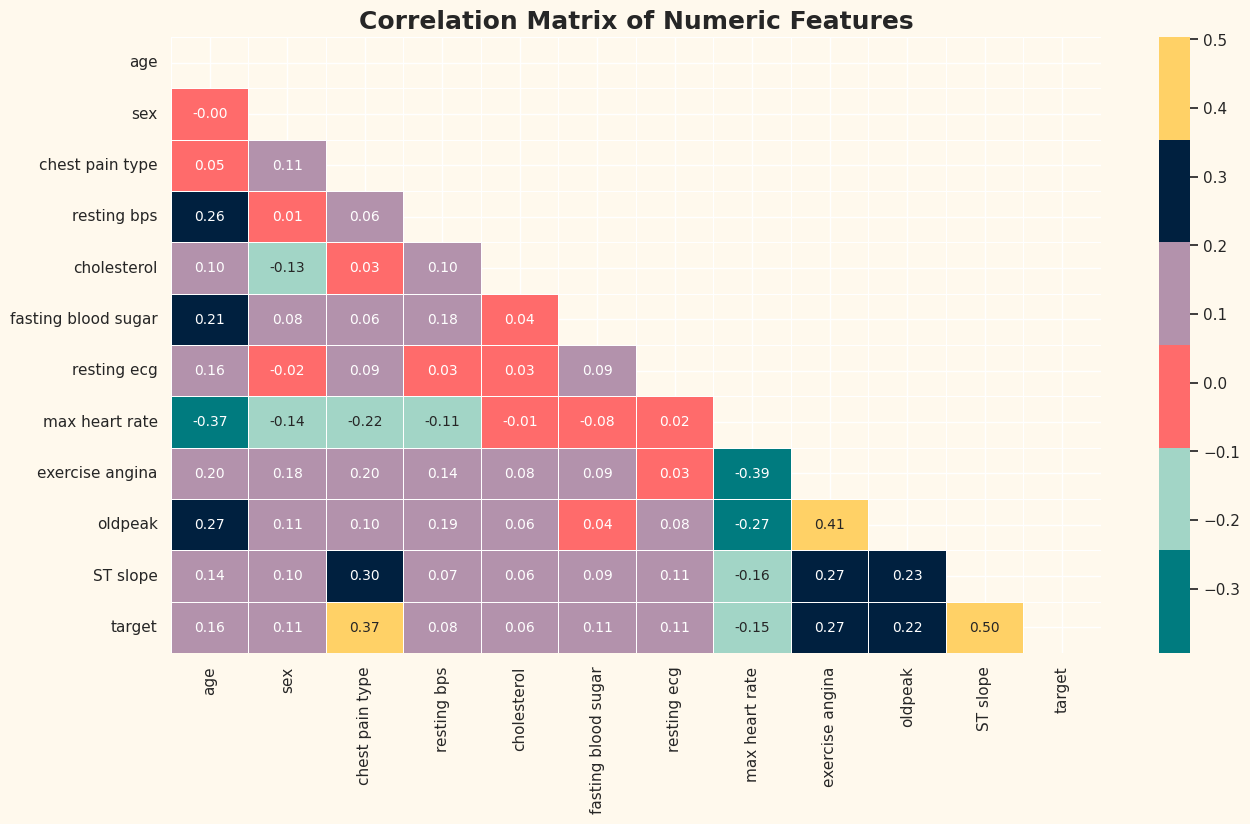

In [16]:
## correlation matrix
correlation_matrix = df.corr(numeric_only=True)

## mask
mask = np.triu(np.ones_like(df.corr(numeric_only=True)))


## heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap=color_map, fmt=".2f",
            annot_kws={'size': 10}, linewidths=0.5, cbar=True)

## title
plt.title("Correlation Matrix of Numeric Features", fontsize=18, weight="bold")

## Show the plot
plt.show()

## Target Distribution

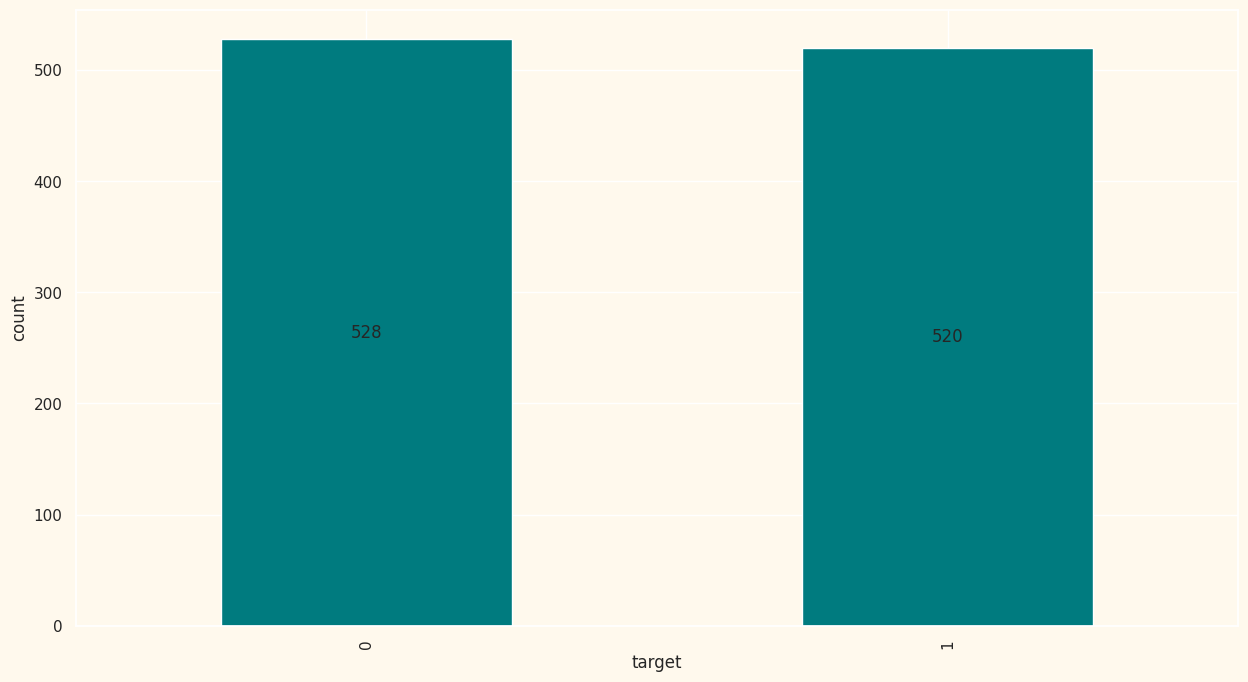

In [17]:
ax=df['target'].value_counts().plot.bar()
# Add count labels to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center')  # Add labels at the center of the bars
plt.xlabel("target")
plt.ylabel("count")
plt.show()

## Relationship between all the independent features and Target Variable

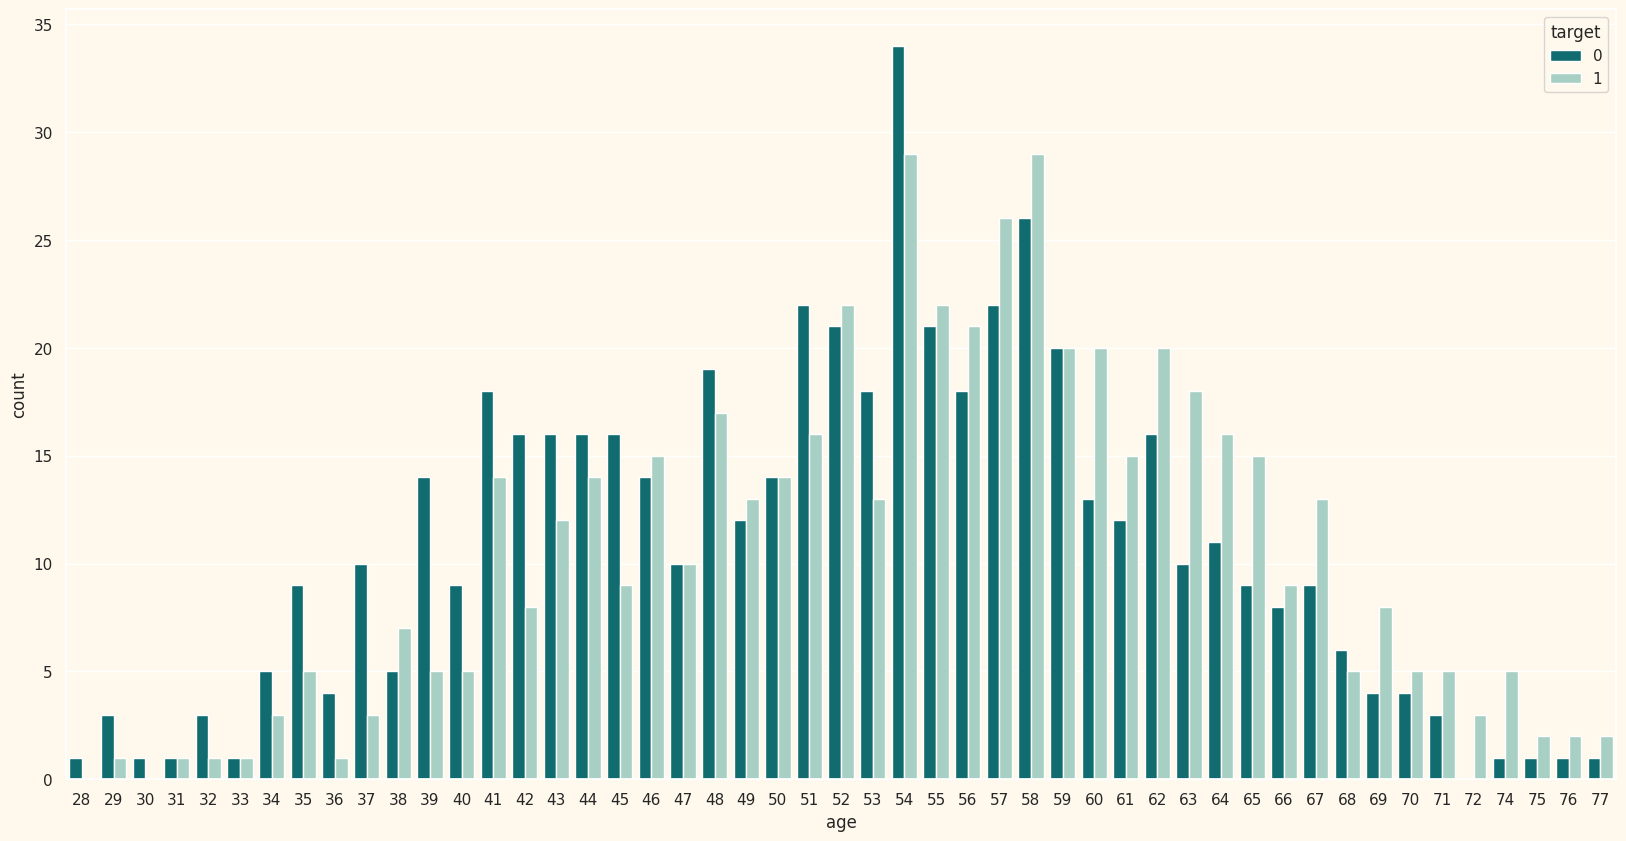

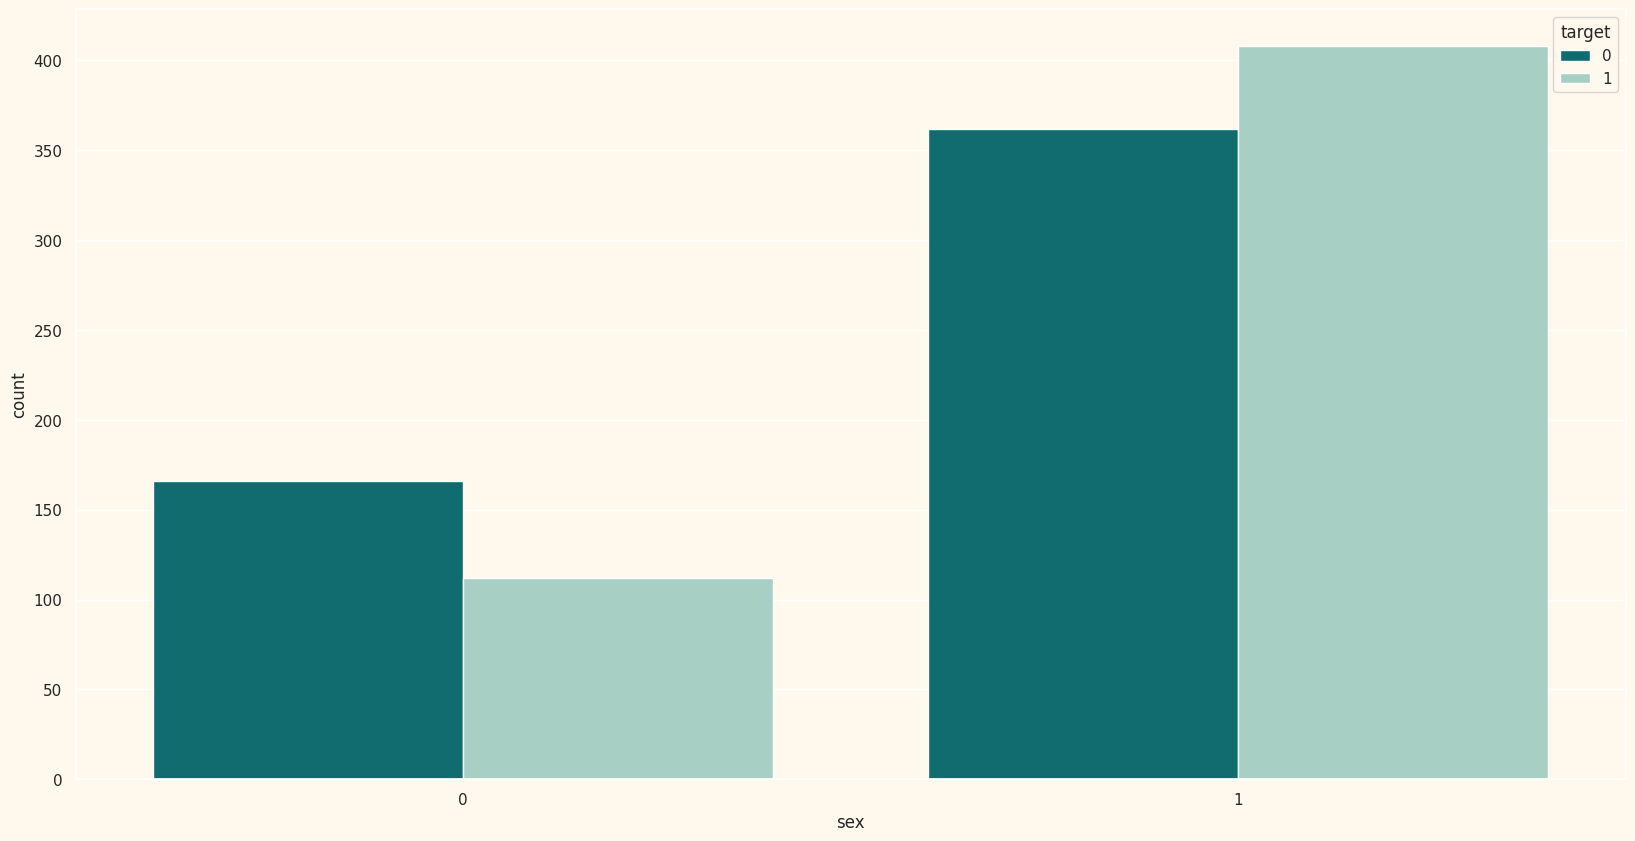

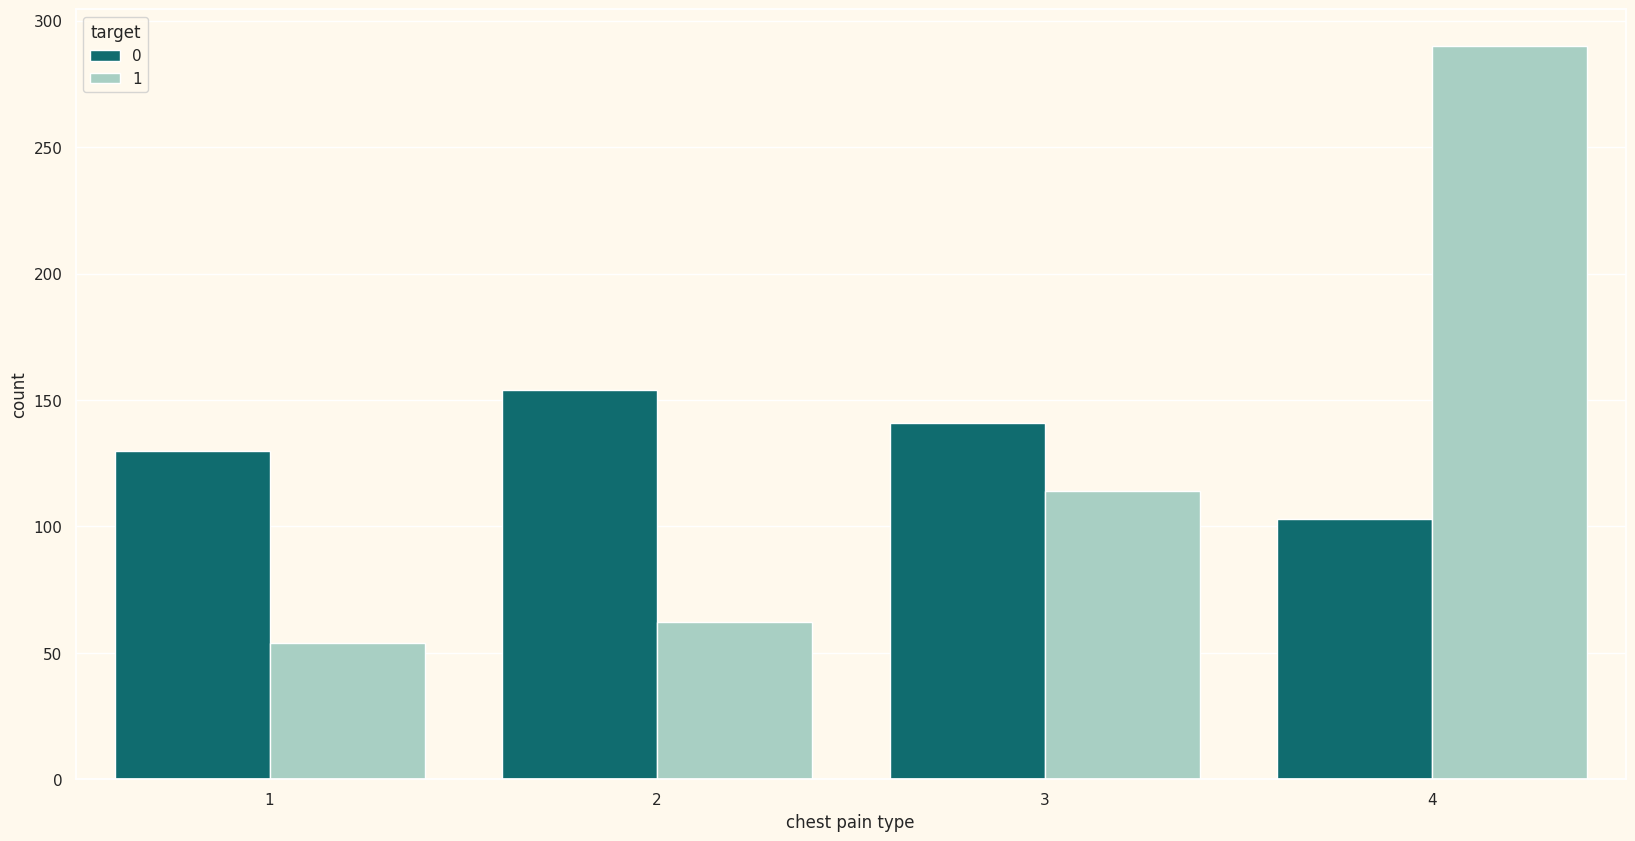

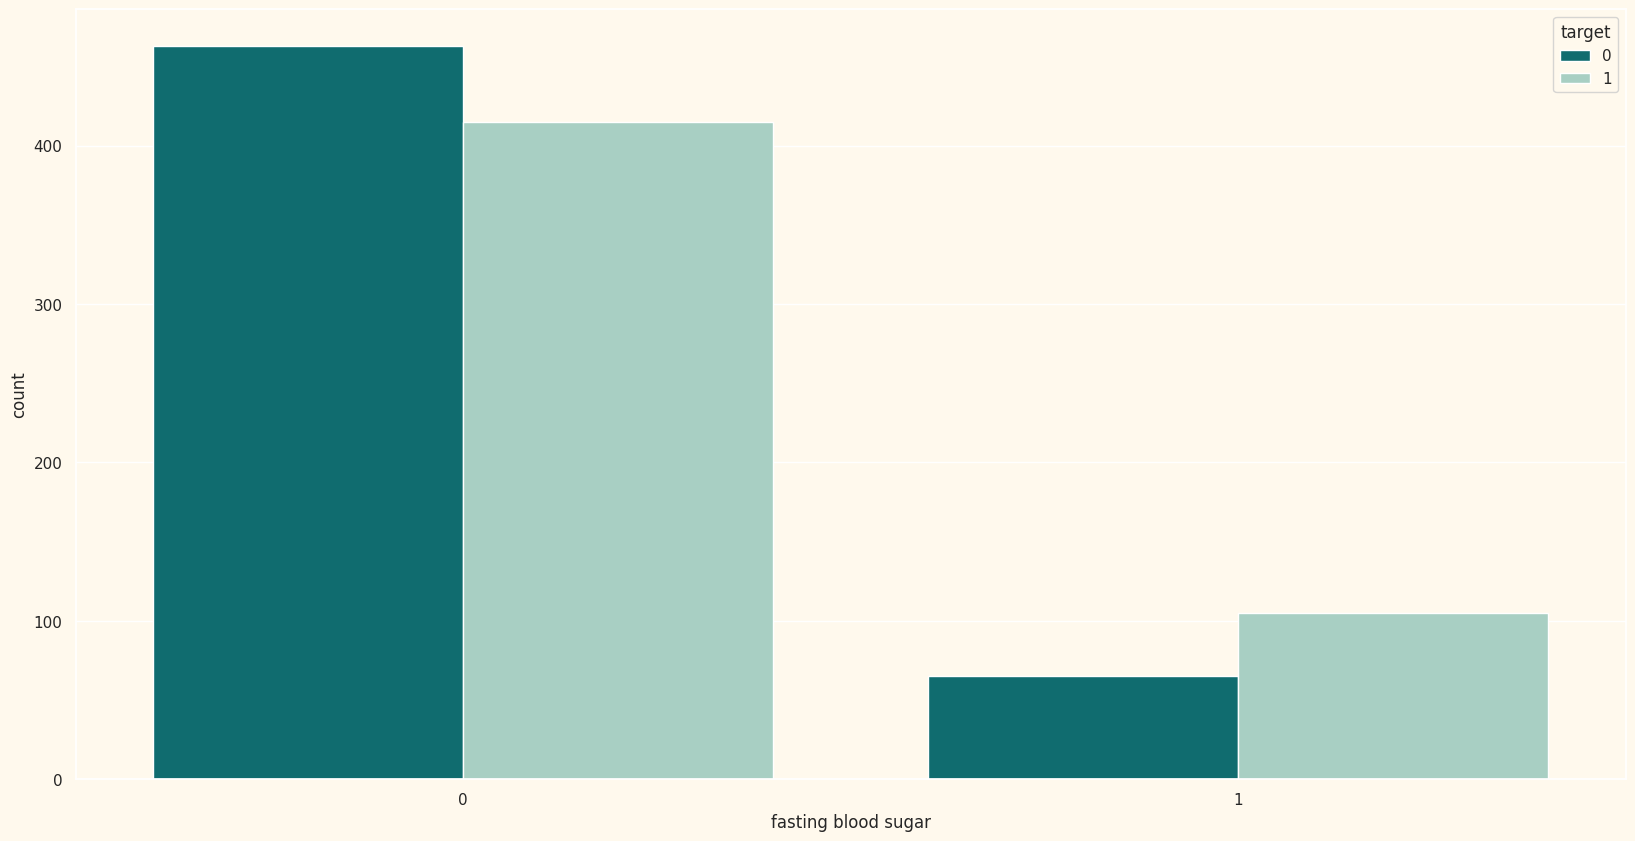

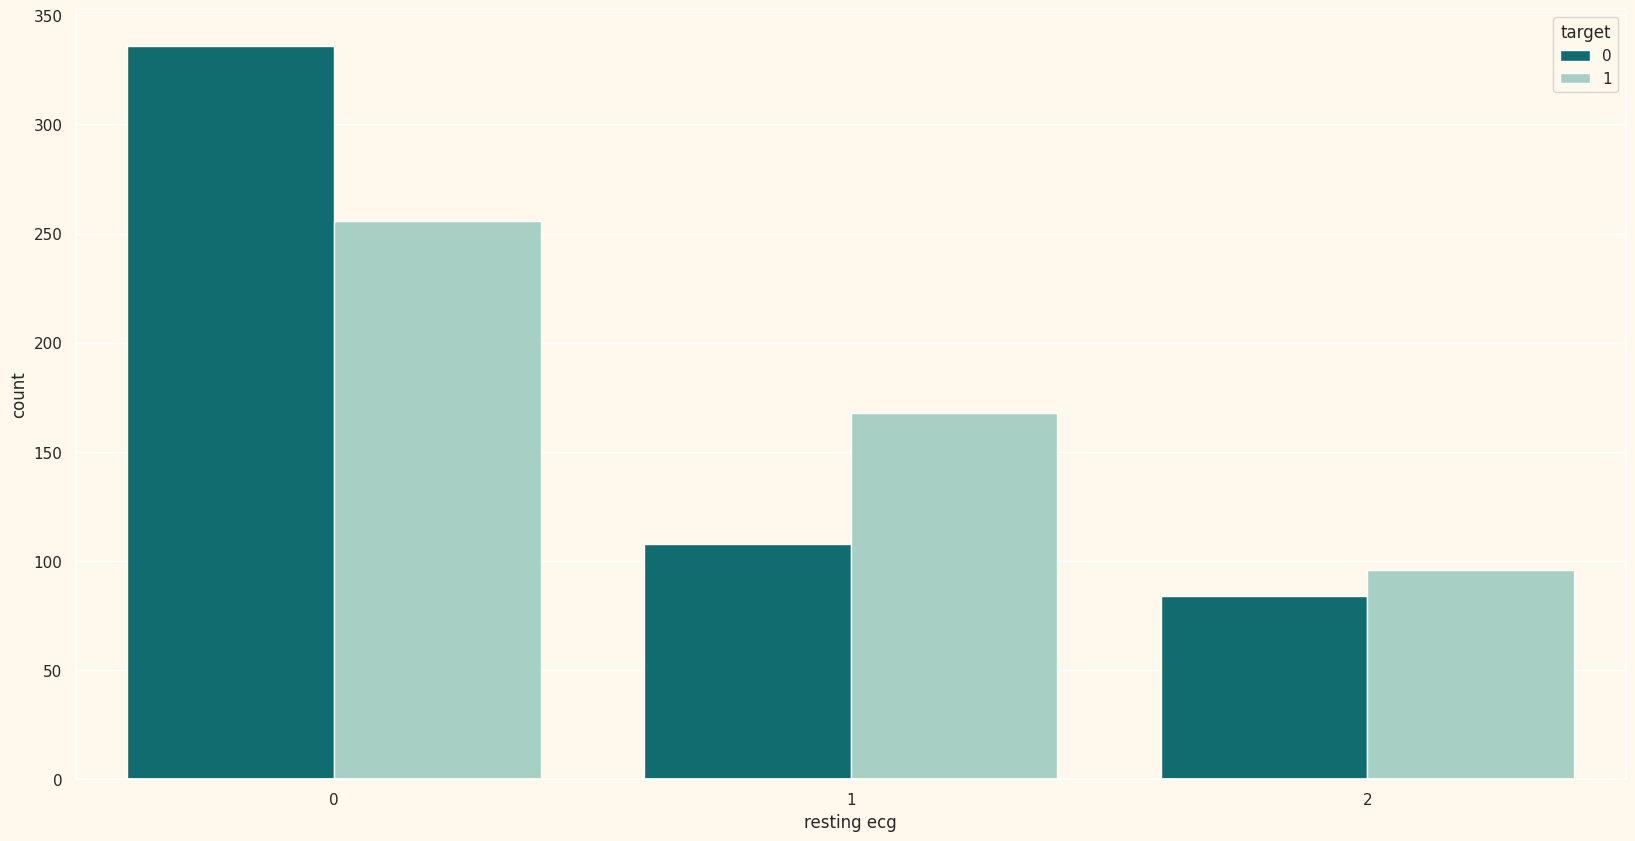

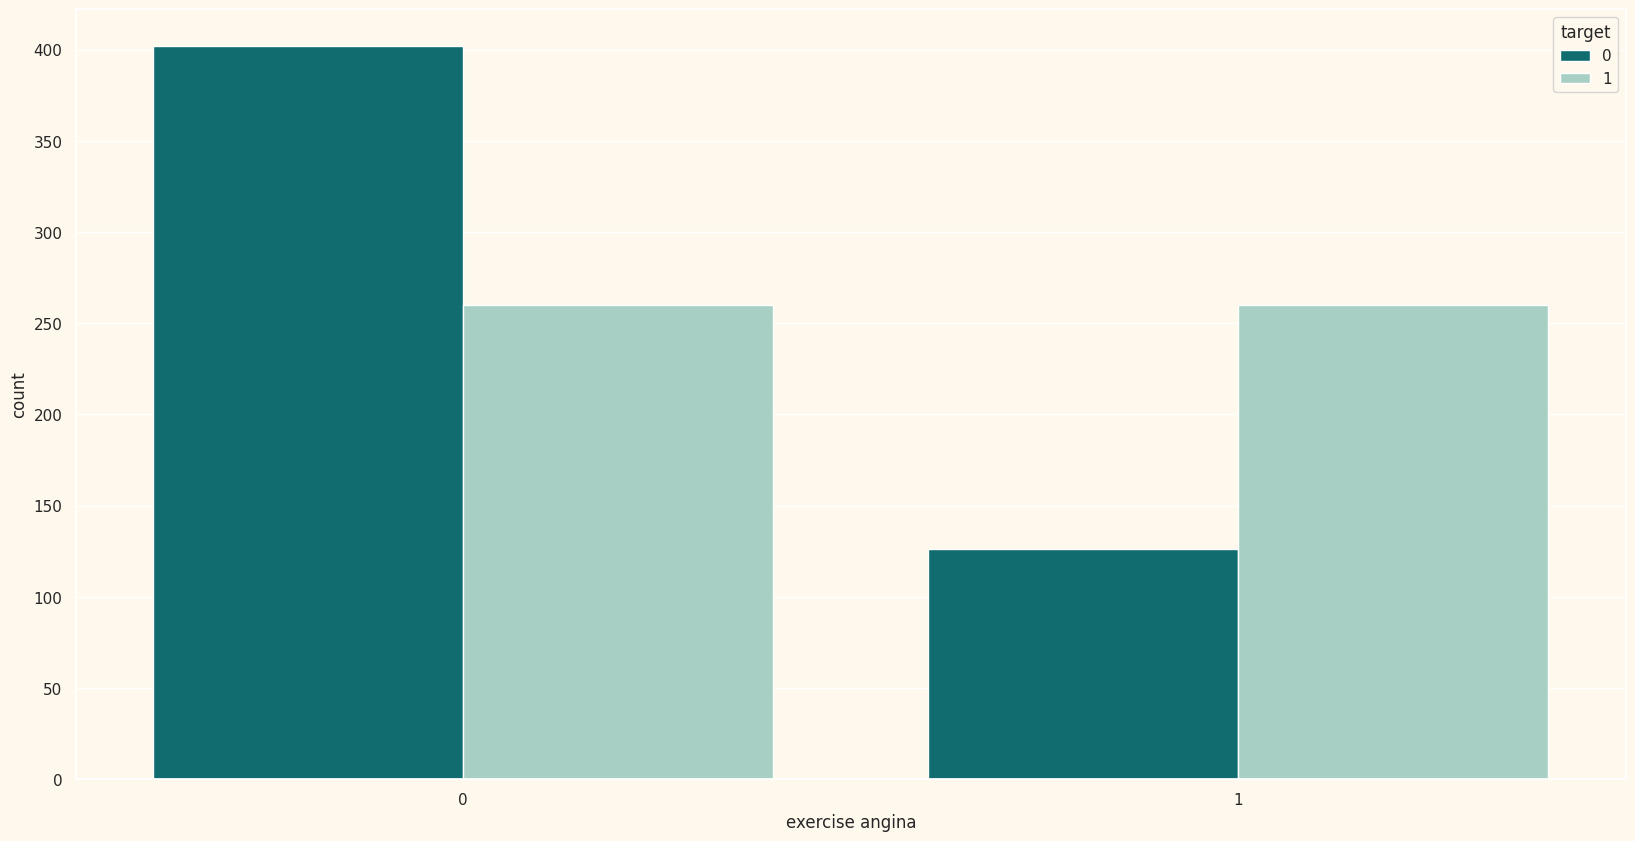

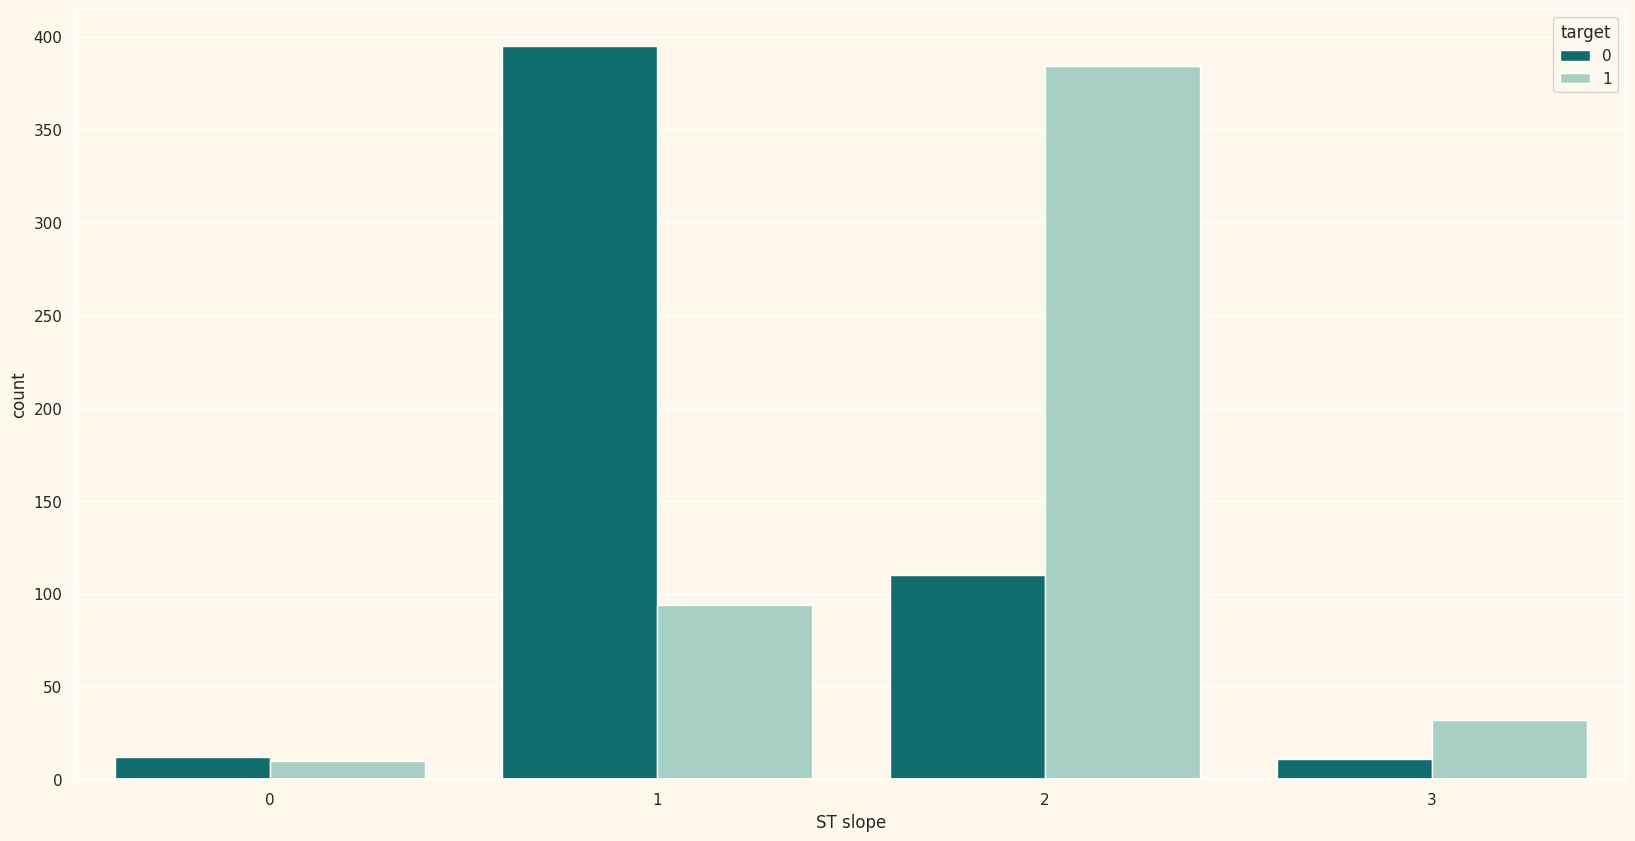

In [18]:
for i, predictor in enumerate(df.drop(columns=["max heart rate","resting bps","max heart rate","oldpeak","cholesterol","target"])):
    plt.figure(figsize=(20,10))
    sns.countplot(data=df, x=predictor, hue='target')

## This is not an imbalanced Dataset

## Univarite Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


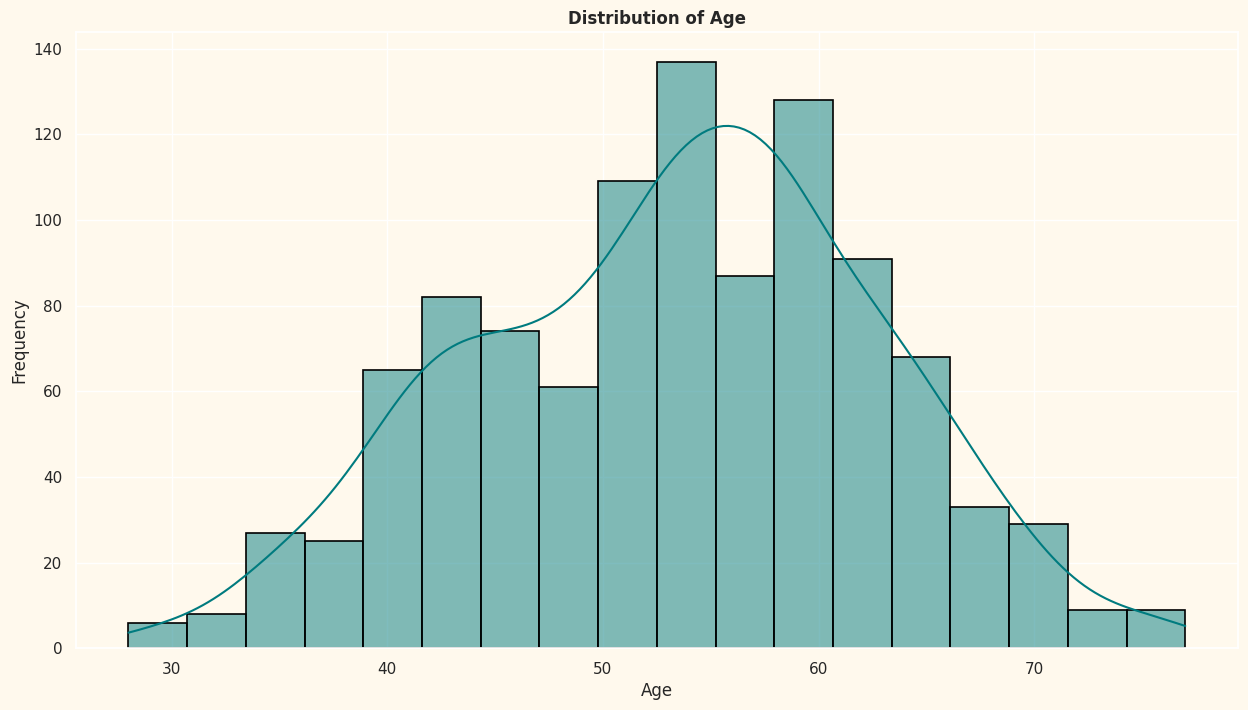

In [19]:
# Plotting the histogram
sns.histplot(data=df, x='age', kde=True, edgecolor="black", linewidth=1.2)

# Customizing the plot
plt.title("Distribution of Age", weight="bold")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Display the plot
plt.show()

In [20]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bps', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

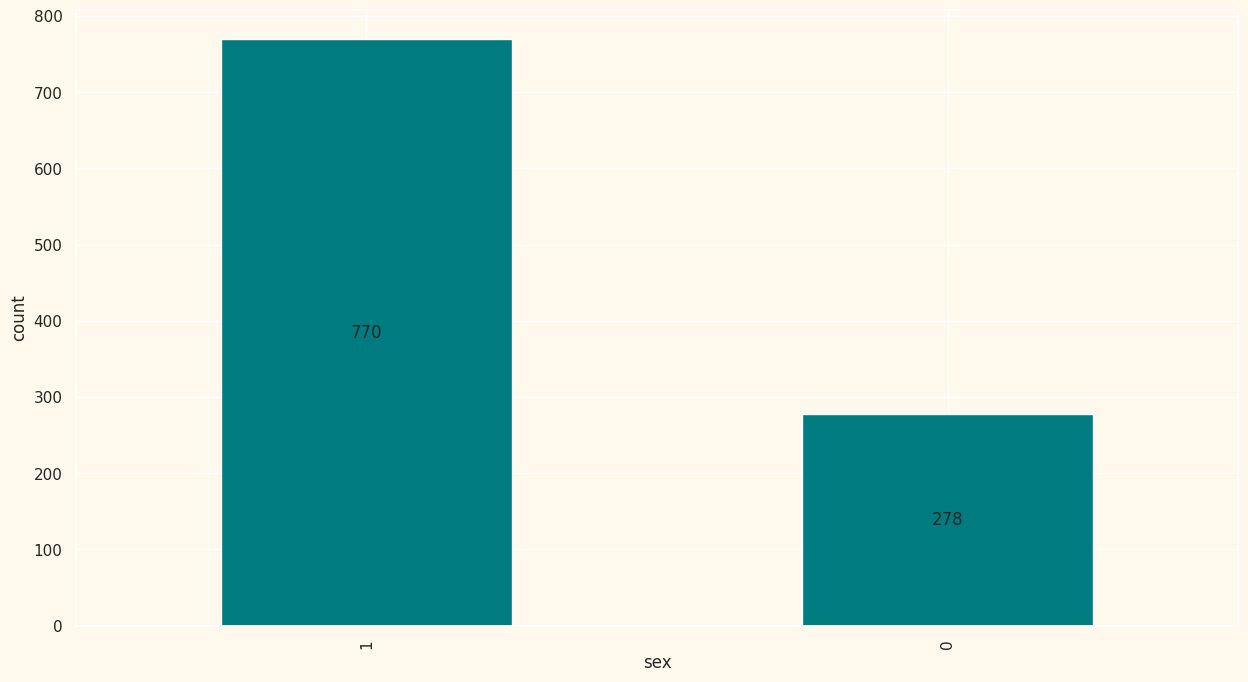

In [21]:
ax=df['sex'].value_counts().plot.bar()
# Add count labels to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center')  # Add labels at the center of the bars
plt.xlabel("sex")
plt.ylabel("count")
plt.show()

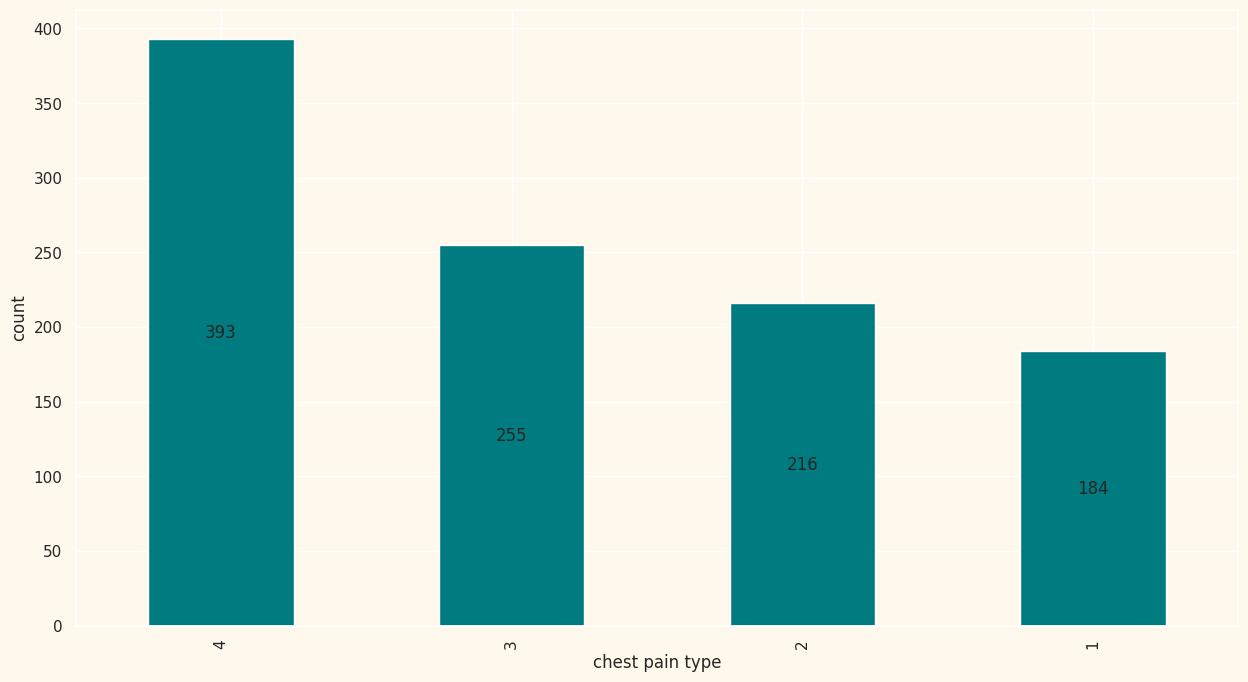

In [22]:
ax=df['chest pain type'].value_counts().plot.bar()
# Add count labels to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center')  # Add labels at the center of the bars
plt.xlabel("chest pain type")
plt.ylabel("count")
plt.show()

In [23]:
df.nunique()

age                     49
sex                      2
chest pain type          4
resting bps             63
cholesterol            221
fasting blood sugar      2
resting ecg              3
max heart rate         109
exercise angina          2
oldpeak                 43
ST slope                 4
target                   2
dtype: int64

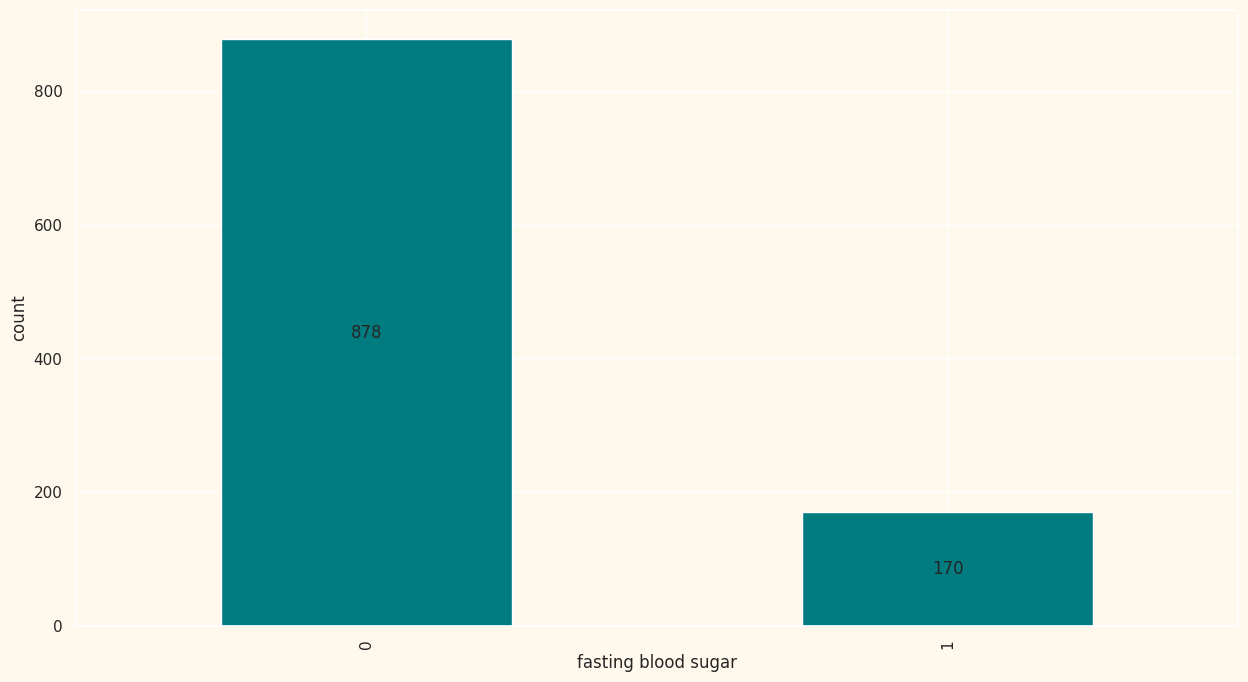

In [24]:
ax=df['fasting blood sugar'].value_counts().plot.bar()
# Add count labels to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center')  # Add labels at the center of the bars
plt.xlabel("fasting blood sugar")
plt.ylabel("count")
plt.show()

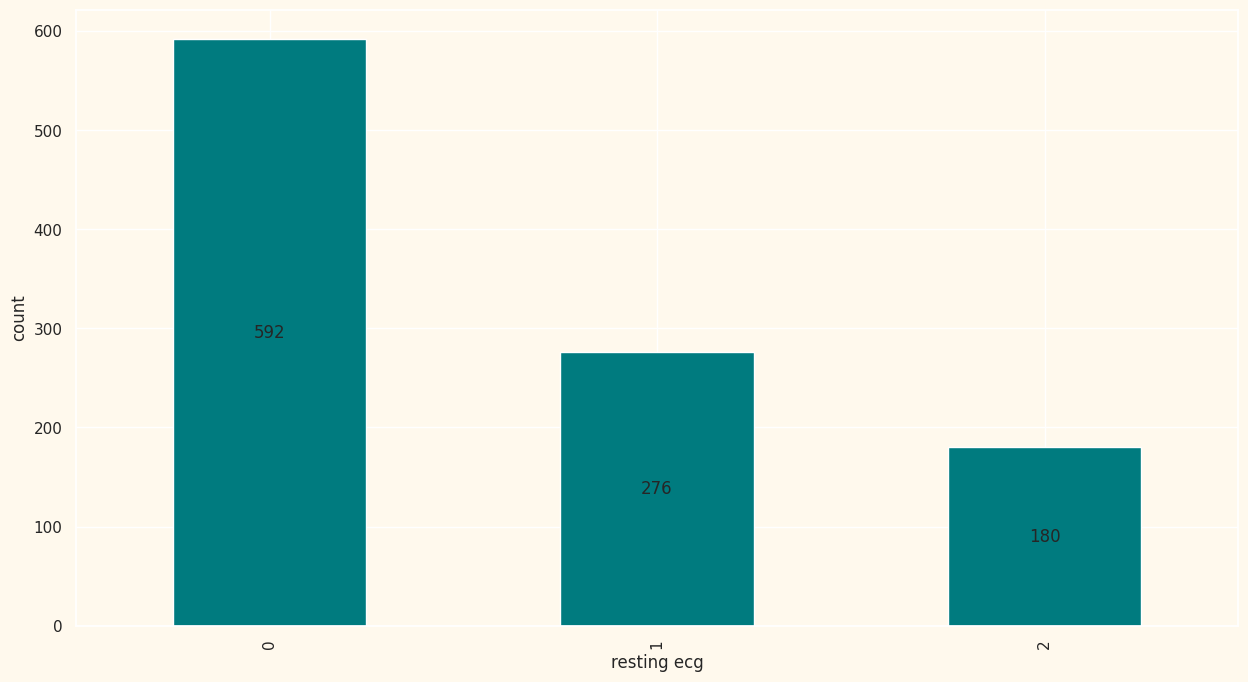

In [25]:
ax=df['resting ecg'].value_counts().plot.bar()
# Add count labels to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center')  # Add labels at the center of the bars
plt.xlabel("resting ecg")
plt.ylabel("count")
plt.show()

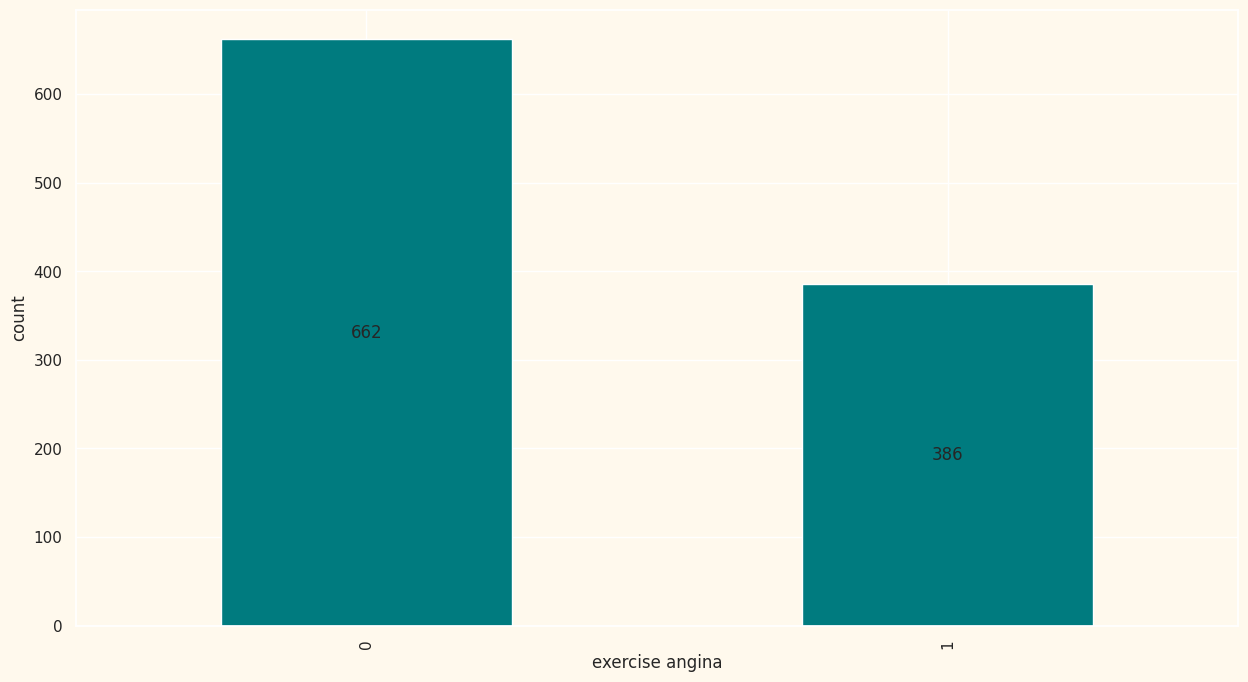

In [26]:
ax=df['exercise angina'].value_counts().plot.bar()
# Add count labels to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center')  # Add labels at the center of the bars
plt.xlabel("exercise angina")
plt.ylabel("count")
plt.show()

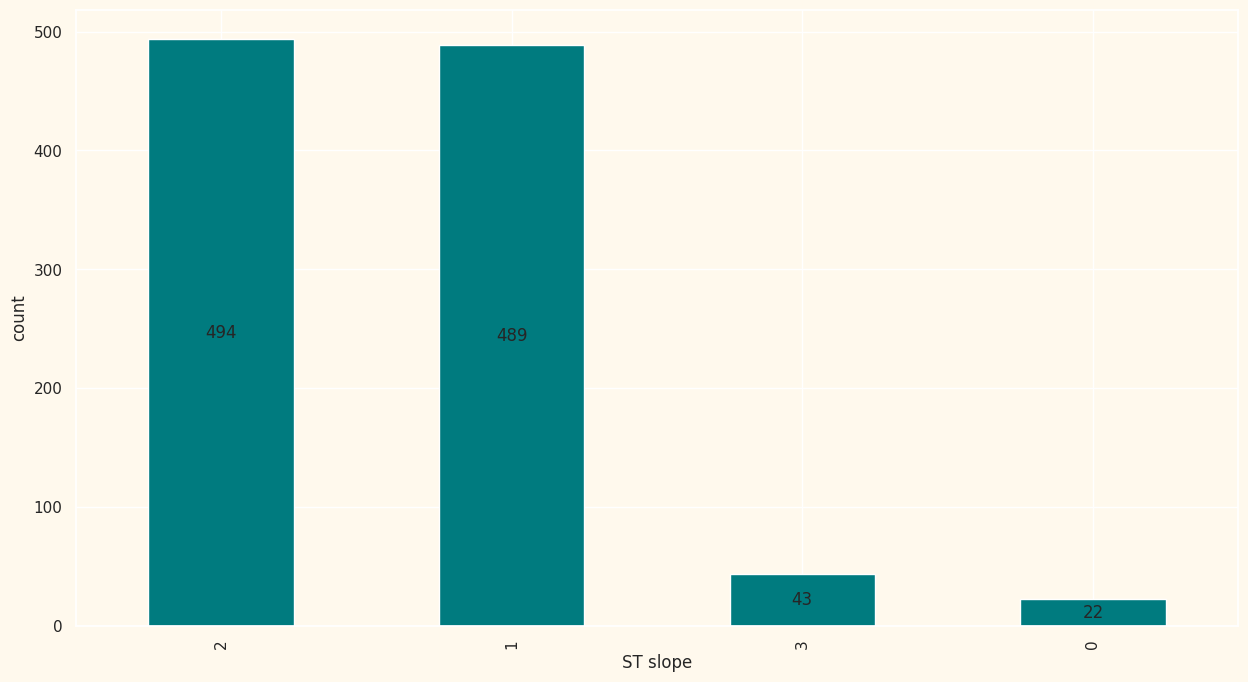

In [27]:
ax=df['ST slope'].value_counts().plot.bar()
# Add count labels to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center')  # Add labels at the center of the bars
plt.xlabel("ST slope")
plt.ylabel("count")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


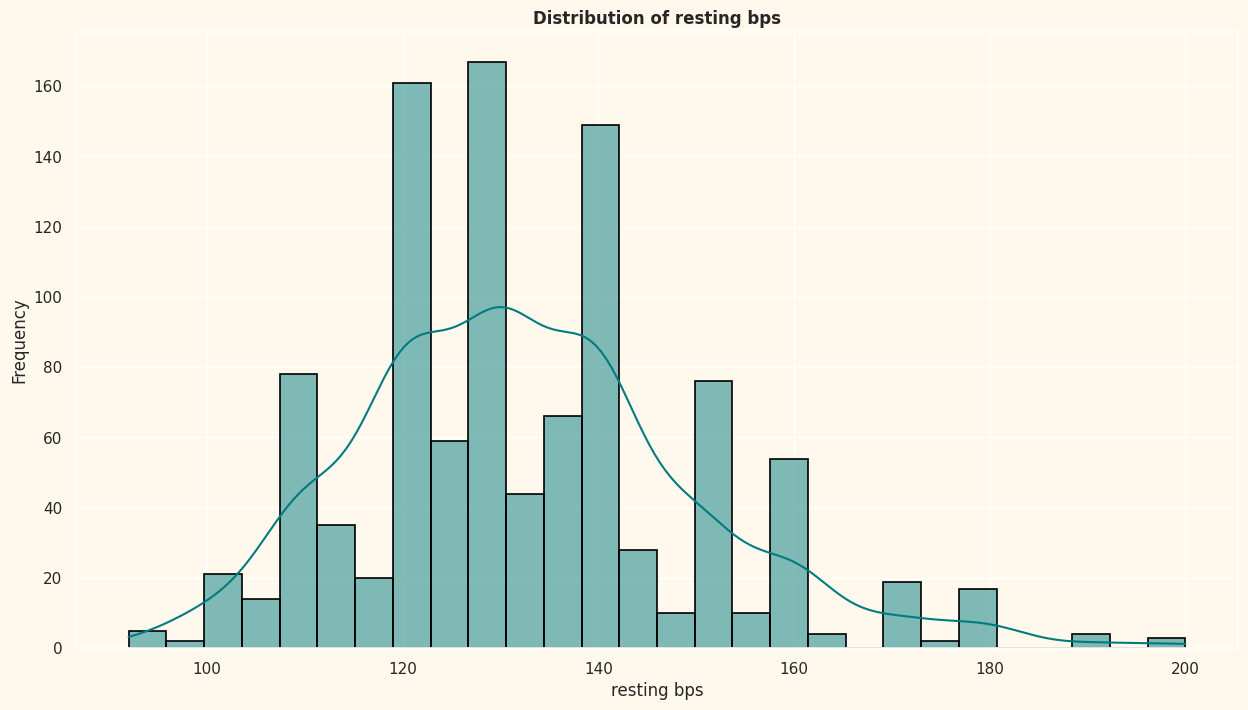

In [28]:
# Plotting the histogram
sns.histplot(data=df, x='resting bps', kde=True, edgecolor="black", linewidth=1.2)

# Customizing the plot
plt.title("Distribution of resting bps", weight="bold")
plt.xlabel("resting bps")
plt.ylabel("Frequency")

# Display the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


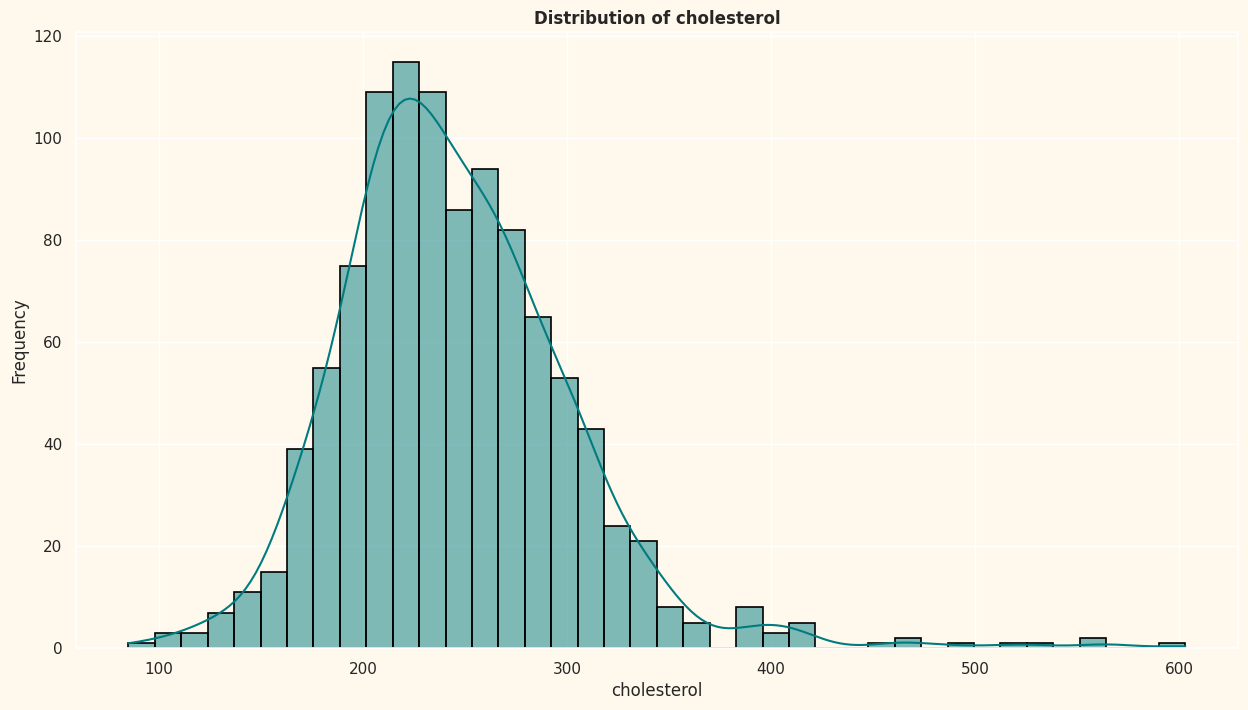

In [29]:
# Plotting the histogram
sns.histplot(data=df, x='cholesterol', kde=True, edgecolor="black", linewidth=1.2)

# Customizing the plot
plt.title("Distribution of cholesterol", weight="bold")
plt.xlabel("cholesterol")
plt.ylabel("Frequency")

# Display the plot
plt.show()

In [30]:
data=df.copy()

In [31]:
df.columns.tolist()

['age',
 'sex',
 'chest pain type',
 'resting bps',
 'cholesterol',
 'fasting blood sugar',
 'resting ecg',
 'max heart rate',
 'exercise angina',
 'oldpeak',
 'ST slope',
 'target']

In [32]:
X_selected=data.drop(['target'],axis=1)
y_selected=data['target']

In [33]:
## sklearn (feature selection)
from sklearn.feature_selection import SelectKBest, f_classif, chi2
## STEP 1 : Create an instance of SelectKBest with the f_classif score function and select the top 15 features
best_feat = SelectKBest(score_func=f_classif, k=10)

## STEP 2 : Fit SelectKBest to the training data to compute feature scores and select the best features
fit_best = best_feat.fit(X_selected, y_selected)

## STEP 3 : Create a DataFrame to store the feature scores
df_scores = pd.DataFrame(fit_best.scores_)

## STEP 4 : Create a DataFrame to store the feature names (column names)
df_columns = pd.DataFrame(X_selected.columns)

## STEP 5 : Concatenate the feature names and their corresponding scores into a single DataFrame
features_score = pd.concat([df_columns, df_scores], axis=1)

## STEP 6 : Rename the columns for clarity
features_score.columns = ['Feature', 'Score']

## STEP 7 : Sort the DataFrame by feature scores in descending order to see the most important features first
features_score.sort_values(by=['Score'], inplace=True, ascending=False)

## STEP 8 : Print the DataFrame to see the feature scores and their corresponding names
features_score.style.background_gradient(cmap=color_map)

,Feature,Score
10,ST slope,355.244365
2,chest pain type,162.385189
8,exercise angina,82.855358
9,oldpeak,51.780394
0,age,26.790160
7,max heart rate,22.782126
1,sex,13.319282
6,resting ecg,13.079904
5,fasting blood sugar,12.090848
3,resting bps,6.393105


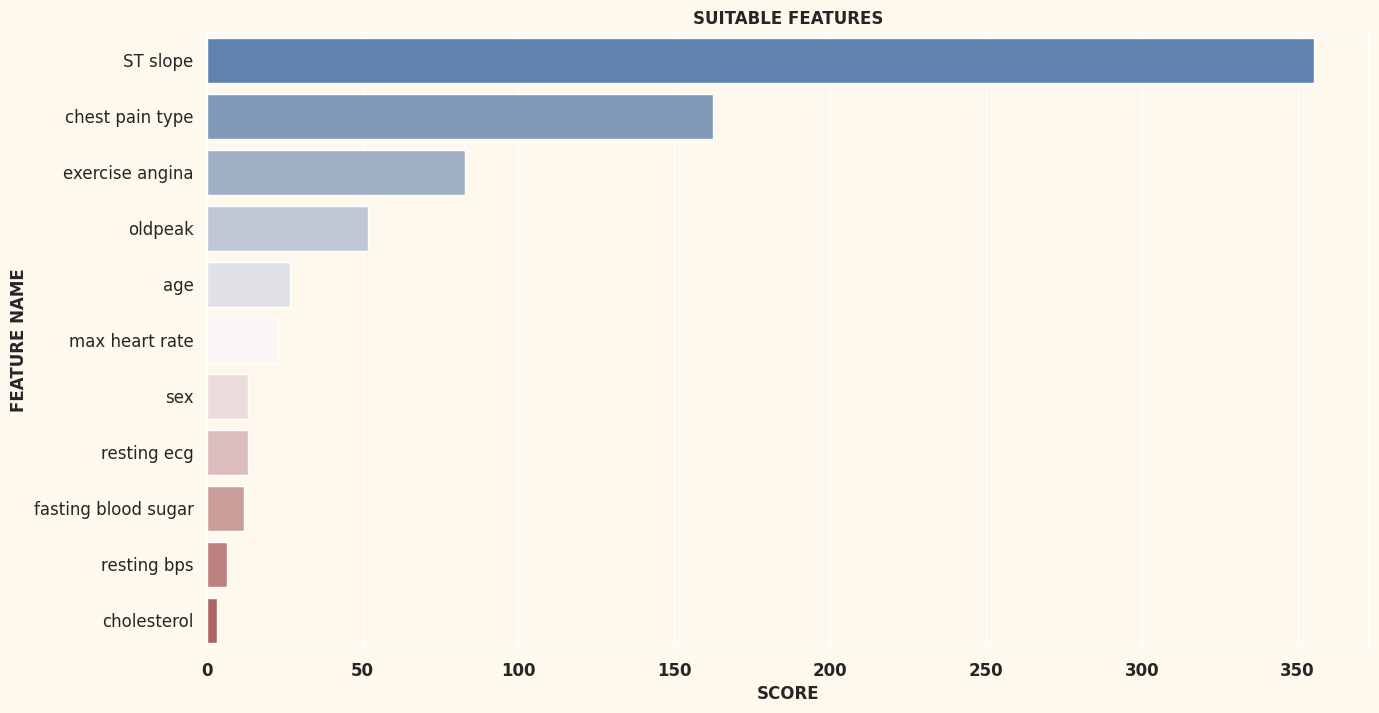

In [34]:
sns.barplot(data=features_score, x='Score', y='Feature', palette="vlag")
plt.title('SUITABLE FEATURES', weight='bold')
plt.xlabel('SCORE', weight='bold')
plt.ylabel('FEATURE NAME', weight='bold')
plt.xticks(fontsize=12, weight="bold")
plt.yticks(fontsize=12)
plt.show()

In [35]:
fit_best = best_feat.fit_transform(X_selected, y_selected)

In [37]:
df_selected = df[list(best_feat.get_feature_names_out())]

In [38]:
df_selected.columns

Index(['age', 'sex', 'chest pain type', 'resting bps', 'fasting blood sugar',
       'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak',
       'ST slope'],
      dtype='object')

In [39]:
X = df_selected
y = df['target'] ## target

In [40]:
## sklearn (preprocessing)
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, OrdinalEncoder,RobustScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import VotingClassifier

In [41]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [42]:
## split train and test (0.75 for training, 0.25 for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42, stratify=y)

print('X Train Shape is ==> ', X_train.shape)
print('y Train Shape is ==> ', y_train.shape)

print('='*30)
print('='*30)

print('X Test Shape is ==> ', X_test.shape)
print('y Test Shape is ==> ', y_test.shape)

X Train Shape is ==>  (786, 10)
y Train Shape is ==>  (786,)
X Test Shape is ==>  (262, 10)
y Test Shape is ==>  (262,)


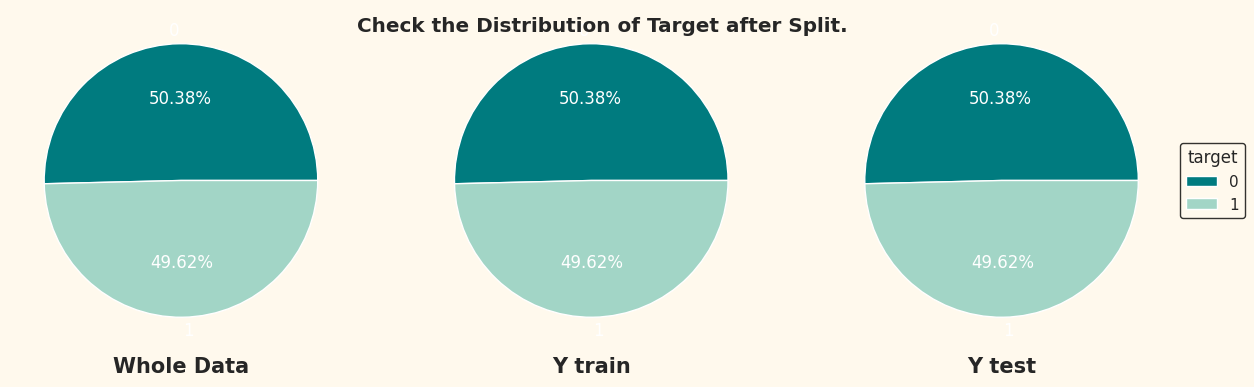

In [43]:
## Let's check the Distribution of target ==> Note i used Stratify When Spliting
## pie plot in matplotlib.pyplot
check_target = [y, y_train, y_test]
label_name = ["Whole Data", "Y train", "Y test"]

plt.suptitle("Check the Distribution of Target after Split.", weight='bold', x=0.52, y=0.7)

for idx, target_name in enumerate(check_target):
    
    label = label_name[idx]
    
    plt.subplot(1, 3, idx+1)
    plt.pie(x=target_name.value_counts().values, labels=target_name.value_counts().index, autopct="%.2f%%",
            textprops=dict(size= 12, color= "white"))
    
    plt.xlabel(label, fontsize=15, weight="bold")
    
plt.legend(labels=target_name.value_counts().index, title="target",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.show()

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Assuming df_selected is a list of numerical column names
numerical_columns = list(df_selected)

# Assuming X_train and X_test are your training and test dataframes

# Create a ColumnTransformer to handle different types of columns (numerical, categorical, etc.)
preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", StandardScaler(), numerical_columns),
        # Add more transformers for other types of columns if needed
    ],
    remainder='passthrough'  # Include non-selected columns as they are
)

# Create the final pipeline
pipeline_final = Pipeline(
    steps=[
        ("preprocessor", preprocessor)
        # Add more steps if needed
    ])

# Transform the training data using the combined pipeline
X_train_final = pipeline_final.fit_transform(X_train)

# Transform the test data using the same pipeline
X_test_final = pipeline_final.transform(X_test)

## Modelling

In [45]:
from sklearn.metrics import f1_score, accuracy_score

def model_performance(model_name, model, X_train_data, X_test_data, y_train_data, y_test_data):
    '''
    Function to evaluate and display the performance of a machine learning model.
    
    Parameters:
    model_name (str): A string representing the name of the model.
    model: The trained machine learning model to be evaluated.
    X_train_data: Training data features.
    X_test_data: Testing data features.
    y_train_data: Training data labels.
    y_test_data: Testing data labels.
    '''
    
    # Make predictions on the training and testing data
    y_train_predicted = model.predict(X_train_data)
    y_test_predicted = model.predict(X_test_data)
    
    ## Print the model name
    print(f"==> Model and some Details: {model_name}")
    
    ## Separator for clarity
    print("**" * 30)
    
    ## Evaluate and print F1-score for training and testing data
    f1_score_training = round(f1_score(y_train_data, y_train_predicted, average='weighted'), 3) * 100
    f1_score_testing = round(f1_score(y_test_data, y_test_predicted, average='weighted'), 3) * 100
    print(f"F1-score for training data using {model_name} : {f1_score_training} %")
    print(f"F1-score for testing data using {model_name} : {f1_score_testing} %")
    
    ## Separator for clarity
    print("**" * 30)
    
    ## Evaluate and print Accuracy Score for training and testing data
    acc_score_training = round(accuracy_score(y_train_data, y_train_predicted), 3) * 100
    acc_score_testing = round(accuracy_score(y_test_data, y_test_predicted), 3) * 100
    print(f"Accuracy Score for training data using {model_name} : {acc_score_training} %")
    print(f"Accuracy Score for testing data using {model_name} : {acc_score_testing} %")

In [46]:
## sklearn (metrics)
from sklearn.metrics import f1_score, accuracy_score, make_scorer, confusion_matrix, classification_report, precision_score, recall_score

## sklearn (tuning)
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [47]:
## Define a custom scoring function for F1 score with 'micro' average
f1_scorer = make_scorer(f1_score, average='micro')

def cross_validation(model_name, model, X_valid, y_valid, CV=5, scoring=f1_scorer):
    """
    Perform cross-validation and print the results.

    Parameters:
    - model_name (str): A name or description of the model being evaluated.
    - model: The estimator or model to be evaluated.
    - X_valid: The input data for validation.
    - y_valid: The target labels for validation.
    - CV (int): The number of cross-validation folds.
    - scoring: Scoring function to use for evaluation (default is F1 score with 'micro' average).

    """

    ## Perform cross-validation
    validation_score = cross_validate(estimator=model, X=X_valid, y=y_valid, cv=CV, return_train_score=True, scoring=scoring)
    
    print(f"==> Model Name and Details > {model_name}")
    
    print("**" * 30)
    
    print(f"Train score : {round(validation_score['train_score'].mean(), 2)} \nstandard deviation For Train Score : {round(validation_score['train_score'].std(), 3)}")
    print("**" * 30)
    print(f"Test score : {round(validation_score['test_score'].mean(), 2)} \nstandard deviation For Test Score : {round(validation_score['test_score'].std(), 3)}")

In [48]:
def conf_matrix(model, title=""):
    """
    Generate a confusion matrix heatmap for evaluating a machine learning model's performance.

    Parameters:
    - model: Trained machine learning model (classifier).
    - title: A title for the confusion matrix plot (optional).

    Returns:
    None
    """
    ## Use the trained model to make predictions on the test data
    y_predict = model.predict(X_test_final)

    ## Create a confusion matrix to evaluate the model's performance
    confusionMatrix = confusion_matrix(y_test, y_predict)

    ## Plot Using Seaborn
    plt.figure(figsize=(9, 7))  ## Set the figure size
    sns.heatmap(confusionMatrix, annot=True, fmt="d", cbar=False)

    ## Add labels and titles to the heatmap
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"{title}")

    ## Show the heatmap
    plt.show()

## Logistic Regression

In [49]:
logistic_reg = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000)
logistic_reg.fit(X_train_final,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [50]:
model_performance(model_name="Logistic Regression",
                  model=logistic_reg,
                  X_train_data=X_train_final,
                  X_test_data=X_test_final,
                  y_train_data=y_train,
                  y_test_data=y_test)

==> Model and some Details: Logistic Regression
************************************************************
F1-score for training data using Logistic Regression : 78.10000000000001 %
F1-score for testing data using Logistic Regression : 78.60000000000001 %
************************************************************
Accuracy Score for training data using Logistic Regression : 78.10000000000001 %
Accuracy Score for testing data using Logistic Regression : 78.60000000000001 %


In [51]:
cross_validation(model_name="Cross Validation Using Estimator Logistic Regression && Scoring=f1-score ",
                 model=logistic_reg,
                 X_valid=X_train_final,
                 y_valid=y_train)

==> Model Name and Details > Cross Validation Using Estimator Logistic Regression && Scoring=f1-score 
************************************************************
Train score : 0.78 
standard deviation For Train Score : 0.006
************************************************************
Test score : 0.77 
standard deviation For Test Score : 0.023


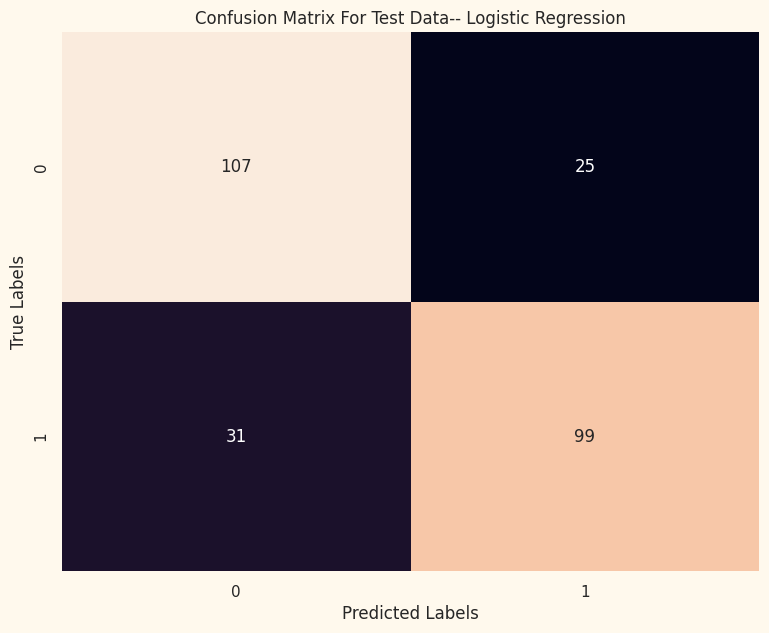

In [52]:
conf_matrix(model=logistic_reg,
            title="Confusion Matrix For Test Data-- logistic Regression".title())

## KNN

In [53]:
## Create a KNN classifier with specific parameters:
## - n_neighbors: The number of neighbors to consider (in this case, 5)
## - p: The power parameter for the Minkowski distance (in this case, 4, indicating the Manhattan distance)
## - n_jobs: Number of CPU cores to use for parallel processing (in this case, -1 means to use all available cores)
KNN_clf = KNeighborsClassifier(n_neighbors=5, p=4, n_jobs=-1)

## Train the KNN classifier on the training data
KNN_clf.fit(X_train_final, y_train)

KNeighborsClassifier(n_jobs=-1, p=4)

In [54]:
model_performance(model_name="K-Nearest Neighbors Algorithm",
                  model=KNN_clf,
                  X_train_data=X_train_final,
                  X_test_data=X_test_final,
                  y_train_data=y_train,
                  y_test_data=y_test)

==> Model and some Details: K-Nearest Neighbors Algorithm
************************************************************
F1-score for training data using K-Nearest Neighbors Algorithm : 82.69999999999999 %
F1-score for testing data using K-Nearest Neighbors Algorithm : 80.2 %
************************************************************
Accuracy Score for training data using K-Nearest Neighbors Algorithm : 82.69999999999999 %
Accuracy Score for testing data using K-Nearest Neighbors Algorithm : 80.2 %


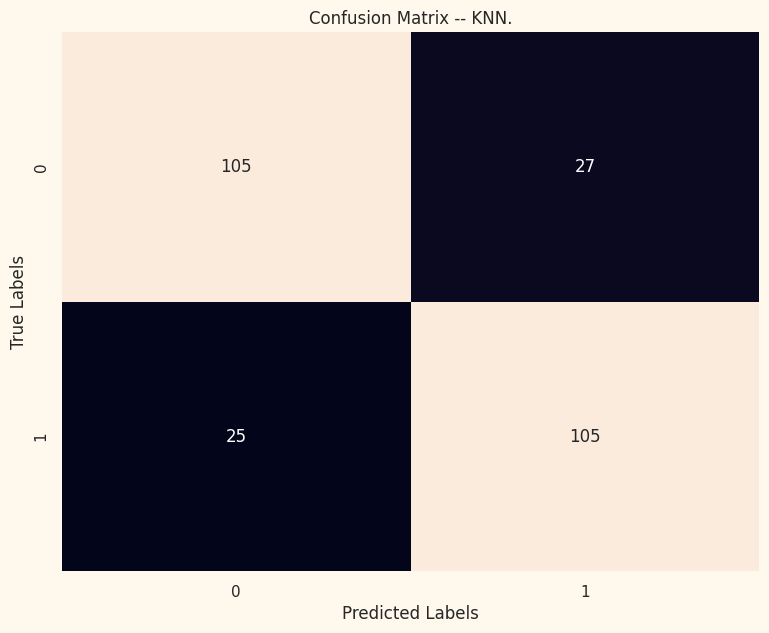

In [55]:
conf_matrix(model=KNN_clf,
            title="Confusion Matrix -- KNN.")

# Naive Bayes

In [56]:
# Create an instance of the Gaussian Naive Bayes classifier
NAIVE_clf = GaussianNB()

# Fit the classifier to the training data
NAIVE_clf.fit(X_train_final, y_train)

GaussianNB()

In [57]:
model_performance(model_name="Naïve Bayes Classifier",
                  model=NAIVE_clf,
                  X_train_data=X_train_final,
                  X_test_data=X_test_final,
                  y_train_data=y_train,
                  y_test_data=y_test)

==> Model and some Details: Naïve Bayes Classifier
************************************************************
F1-score for training data using Naïve Bayes Classifier : 73.0 %
F1-score for testing data using Naïve Bayes Classifier : 72.8 %
************************************************************
Accuracy Score for training data using Naïve Bayes Classifier : 73.0 %
Accuracy Score for testing data using Naïve Bayes Classifier : 72.89999999999999 %


## SVM

In [58]:
# Create an instance of the Support Vector Machine (SVM) classifier with specified parameters:
# - C: The regularization parameter. In this case, C=2.
# - kernel: The kernel function used for classification. Here, we're using a polynomial kernel.
# - degree: The degree of the polynomial kernel. In this case, degree=3.
SVC_clf = SVC(C=2, kernel="poly", degree=3)

# Fit the SVM classifier to the training data
SVC_clf.fit(X_train_final, y_train)

SVC(C=2, kernel='poly')

In [59]:
model_performance(model_name="Support Vector Machine (Ploy Kernal)",
                  model=SVC_clf,
                  X_train_data=X_train_final,
                  X_test_data=X_test_final,
                  y_train_data=y_train,
                  y_test_data=y_test)

==> Model and some Details: Support Vector Machine (Ploy Kernal)
************************************************************
F1-score for training data using Support Vector Machine (Ploy Kernal) : 84.39999999999999 %
F1-score for testing data using Support Vector Machine (Ploy Kernal) : 79.80000000000001 %
************************************************************
Accuracy Score for training data using Support Vector Machine (Ploy Kernal) : 84.39999999999999 %
Accuracy Score for testing data using Support Vector Machine (Ploy Kernal) : 79.80000000000001 %


## SVM using RBF Kernel

In [60]:
# Create an instance of the Support Vector Machine (SVM) classifier with specified parameters:
# - C: The regularization parameter. In this case, C=2.
# - kernel: The kernel function used for classification. Here, we're using a radial basis function (RBF) kernel.
# - gamma: The kernel coefficient for the RBF kernel. In this case, gamma=0.1.
SVC_clf_rbf = SVC(C=2, kernel='rbf', gamma=0.1, probability=True)

# Fit the SVM classifier to the training data
SVC_clf_rbf.fit(X_train_final, y_train)

SVC(C=2, gamma=0.1, probability=True)

In [61]:
model_performance(model_name="Support Vector Machine (RBF Kernal)",
                  model=SVC_clf_rbf,
                  X_train_data=X_train_final,
                  X_test_data=X_test_final,
                  y_train_data=y_train,
                  y_test_data=y_test)

==> Model and some Details: Support Vector Machine (RBF Kernal)
************************************************************
F1-score for training data using Support Vector Machine (RBF Kernal) : 84.1 %
F1-score for testing data using Support Vector Machine (RBF Kernal) : 79.4 %
************************************************************
Accuracy Score for training data using Support Vector Machine (RBF Kernal) : 84.1 %
Accuracy Score for testing data using Support Vector Machine (RBF Kernal) : 79.4 %


In [62]:
cross_validation(model_name="Cross Validation Using Estimator SVC Using Poly kernal && Scoring=f1-score",
                 model=SVC_clf_rbf,
                 X_valid=X_train_final,
                 y_valid=y_train)

==> Model Name and Details > Cross Validation Using Estimator SVC Using Poly kernal && Scoring=f1-score
************************************************************
Train score : 0.85 
standard deviation For Train Score : 0.009
************************************************************
Test score : 0.78 
standard deviation For Test Score : 0.03


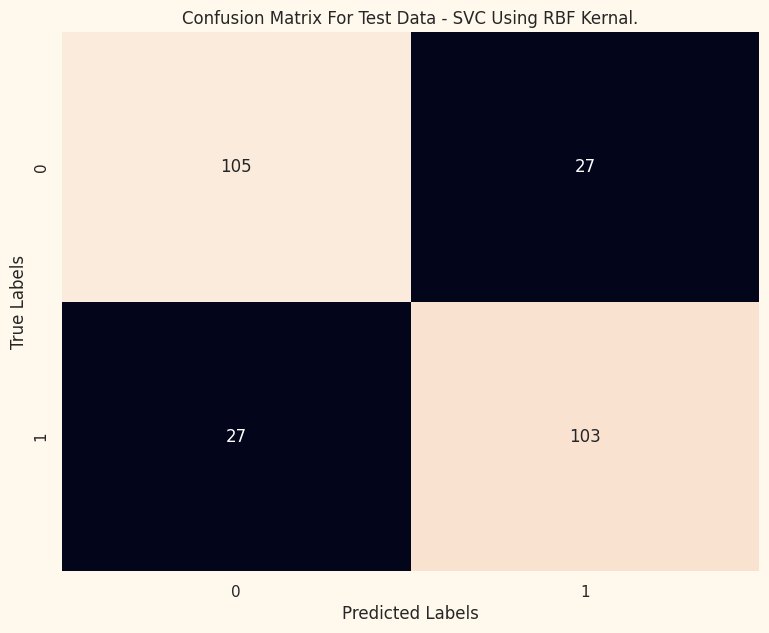

In [63]:
conf_matrix(model=SVC_clf_rbf,
            title="Confusion Matrix For Test Data - SVC Using RBF Kernal.")

## Random Forest

In [64]:
# Create a Random Forest classifier with specific parameters:
# - n_estimators: The number of decision trees in the forest (in this case, 200)
# - max_depth: The maximum depth of each decision tree (in this case, 12)
# - random_state: A seed value for random number generation to ensure reproducibility (in this case, 45)
RF_clf = RandomForestClassifier(n_estimators=200, max_depth=12, random_state=45)

# Train the Random Forest classifier on the training data
RF_clf.fit(X_train_final, y_train)

RandomForestClassifier(max_depth=12, n_estimators=200, random_state=45)

In [65]:
model_performance(model_name="Random Forest.",
                  model=RF_clf,
                  X_train_data=X_train_final,
                  X_test_data=X_test_final,
                  y_train_data=y_train,
                  y_test_data=y_test)

==> Model and some Details: Random Forest.
************************************************************
F1-score for training data using Random Forest. : 100.0 %
F1-score for testing data using Random Forest. : 80.5 %
************************************************************
Accuracy Score for training data using Random Forest. : 100.0 %
Accuracy Score for testing data using Random Forest. : 80.5 %


In [66]:
cross_validation(model_name="Cross Validation Using Estimator (Random Forest) && Scoring=f1-score ",
                 model=RF_clf,
                 X_valid=X_train_final,
                 y_valid=y_train)

==> Model Name and Details > Cross Validation Using Estimator (Random Forest) && Scoring=f1-score 
************************************************************
Train score : 1.0 
standard deviation For Train Score : 0.0
************************************************************
Test score : 0.77 
standard deviation For Test Score : 0.032


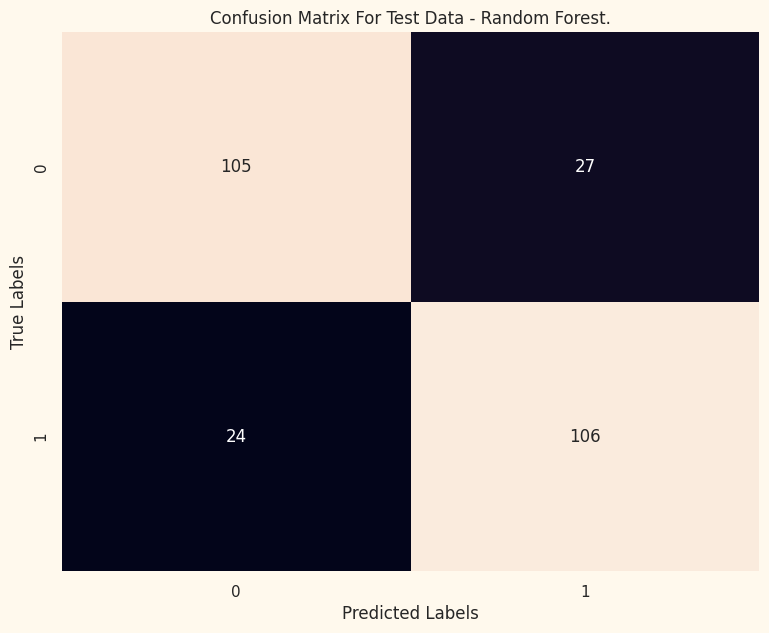

In [67]:
conf_matrix(model=RF_clf,
            title="Confusion Matrix For Test Data - Random Forest.".title())